# <h1 style='background:#8F312E; border:2; border-radius: 10px; font-size:250%; font-weight: bold; color:white'><center>Laptop Specs and latest price</center></h1> 

In [1]:
import pandas as pd
import numpy as np
from scipy import stats

import seaborn as sns
import matplotlib.pyplot as plt

import missingno as msno

import plotly
import plotly.express as px


In [2]:
train = pd.read_csv('Laptop_data.csv')

Let's look at the data.

In [5]:
train

brand     model processor_brand     processor_name processor_gnrtn  \
0     Lenovo   A6-9225             AMD  A6-9225 Processor            10th   
1     Lenovo   Ideapad             AMD           APU Dual            10th   
2      Avita      PURA             AMD           APU Dual            10th   
3      Avita      PURA             AMD           APU Dual            10th   
4      Avita      PURA             AMD           APU Dual            10th   
..       ...       ...             ...                ...             ...   
891     ASUS       ROG             AMD            Ryzen 9         Missing   
892     ASUS     Ryzen             AMD            Ryzen 9         Missing   
893     ASUS     Ryzen             AMD            Ryzen 9         Missing   
894  SAMSUNG    Galaxy        Qualcomm      Snapdragon 7c         Missing   
895   Lenovo  Thinkpad             AMD            Ryzen 5            10th   

      ram_gb ram_type      ssd      hdd       os  ... display_size  warranty  \
0    4 GB GB     DDR4     0 GB  1024 GB  Windows  ...      Missing         0   
1    4 GB GB     DDR4     0 GB   512 GB  Windows  ...      Missing         0   
2    4 GB GB     DDR4   128 GB     0 GB  Windows  ...      Missing         0   
3    4 GB GB     DDR4   128 GB     0 GB  Windows  ...      Missing         0   
4    4 GB GB     DDR4   256 GB     0 GB  Windows  ...      Missing         0   
..       ...      ...      ...      ...      ...  ...          ...       ...   
891  4 GB GB     DDR4  1024 GB     0 GB  Windows  ...           16         1   
892  4 GB GB     DDR4  1024 GB     0 GB  Windows  ...      Missing         1   
893  4 GB GB     DDR4  1024 GB     0 GB  Windows  ...           16         1   
894  4 GB GB  LPDDR4X     0 GB   512 GB  Windows  ...      Missing         0   
895  8 GB GB     DDR4   512 GB     0 GB      DOS  ...           14         0   

    Touchscreen msoffice  latest_price old_price discount  star_rating  \
0            No       No         24990     32790       23          3.7   
1            No       No         19590     21325        8          3.6   
2            No       No         19990     27990       28          3.7   
3            No       No         21490     27990       23          3.7   
4            No       No         24990     33490       25          3.7   
..          ...      ...           ...       ...      ...          ...   
891          No       No        144990    194990       25          0.0   
892          No       No        149990         0        0          0.0   
893          No       No        142990         0        0          0.0   
894          No       No         38990     47990       18          0.0   
895          No       No         57490     78400       26          4.2   

     ratings  reviews  
0         63       12  
1       1894      256  
2       1153      159  
3       1153      159  
4       1657      234  
..       ...      ...  
891        0        0  
892        0        0  
893        0        0  
894        0        0  
895       18        4  

[896 rows x 23 columns]

The data are presented by 896 objects according to 23 features.

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 896 entries, 0 to 895
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   brand            896 non-null    object 
 1   model            896 non-null    object 
 2   processor_brand  896 non-null    object 
 3   processor_name   896 non-null    object 
 4   processor_gnrtn  896 non-null    object 
 5   ram_gb           896 non-null    object 
 6   ram_type         896 non-null    object 
 7   ssd              896 non-null    object 
 8   hdd              896 non-null    object 
 9   os               896 non-null    object 
 10  os_bit           896 non-null    object 
 11  graphic_card_gb  896 non-null    int64  
 12  weight           896 non-null    object 
 13  display_size     896 non-null    object 
 14  warranty         896 non-null    int64  
 15  Touchscreen      896 non-null    object 
 16  msoffice         896 non-null    object 
 17  latest_price    

In [7]:
train.describe()

graphic_card_gb    warranty   latest_price      old_price    discount  \
count       896.000000  896.000000     896.000000     896.000000  896.000000   
mean          1.198661    0.691964   76309.860491   88134.154018   18.527902   
std           2.057454    0.606282   46613.354368   55719.645554   10.508486   
min           0.000000    0.000000   13990.000000       0.000000    0.000000   
25%           0.000000    0.000000   45490.000000   54940.500000   11.000000   
50%           0.000000    1.000000   63494.000000   78052.500000   19.000000   
75%           2.000000    1.000000   89090.000000  111019.500000   26.000000   
max           8.000000    3.000000  441990.000000  377798.000000   57.000000   

       star_rating       ratings      reviews  
count   896.000000    896.000000   896.000000  
mean      2.980469    367.391741    46.152902  
std       1.965254   1106.309355   136.079586  
min       0.000000      0.000000     0.000000  
25%       0.000000      0.000000     0.000000  
50%       4.100000     19.000000     3.000000  
75%       4.400000    179.500000    23.250000  
max       5.000000  15279.000000  1947.000000

Let's check the information for gaps.

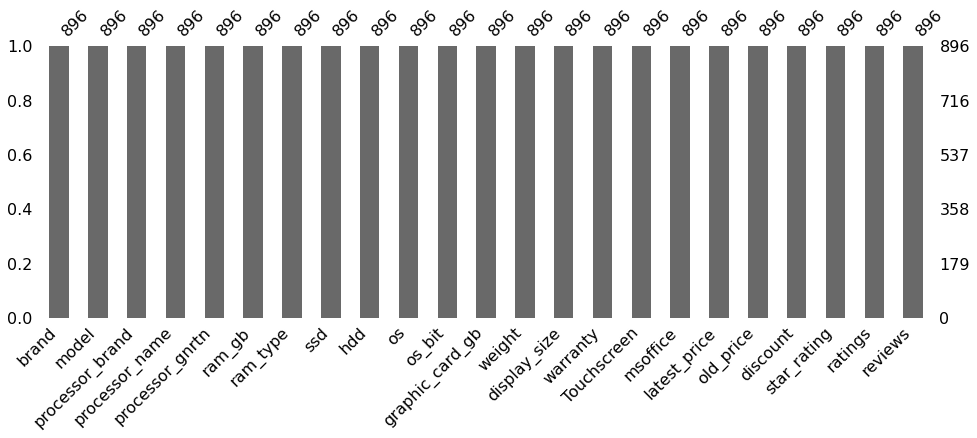

In [8]:
msno.bar(train, figsize = (16,5))
plt.show()

In [3]:
from pandas_profiling import ProfileReport
profile = ProfileReport(train)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [10]:
profile.to_file("my_report.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [11]:
train.duplicated().sum()

0

In [10]:
train=train.drop_duplicates(keep='last')

In [12]:
for column_name in train.columns:
    unique_values = len(train[column_name].unique())
    print("Feature '{column_name}' has '{unique_values}' unique values".format(column_name = column_name,
                                                                                         unique_values=unique_values))

Feature 'brand' has '21' unique values
Feature 'model' has '117' unique values
Feature 'processor_brand' has '5' unique values
Feature 'processor_name' has '28' unique values
Feature 'processor_gnrtn' has '8' unique values
Feature 'ram_gb' has '4' unique values
Feature 'ram_type' has '6' unique values
Feature 'ssd' has '8' unique values
Feature 'hdd' has '4' unique values
Feature 'os' has '3' unique values
Feature 'os_bit' has '2' unique values
Feature 'graphic_card_gb' has '5' unique values
Feature 'weight' has '3' unique values
Feature 'display_size' has '16' unique values
Feature 'warranty' has '4' unique values
Feature 'Touchscreen' has '2' unique values
Feature 'msoffice' has '2' unique values
Feature 'latest_price' has '429' unique values
Feature 'old_price' has '564' unique values
Feature 'discount' has '48' unique values
Feature 'star_rating' has '30' unique values
Feature 'ratings' has '310' unique values
Feature 'reviews' has '152' unique values


In [15]:
numeric=['latest_price', 'old_price','ratings', 'reviews']

Text(0.5, 0.98, 'Visualizing continuous columns (train dataset)')

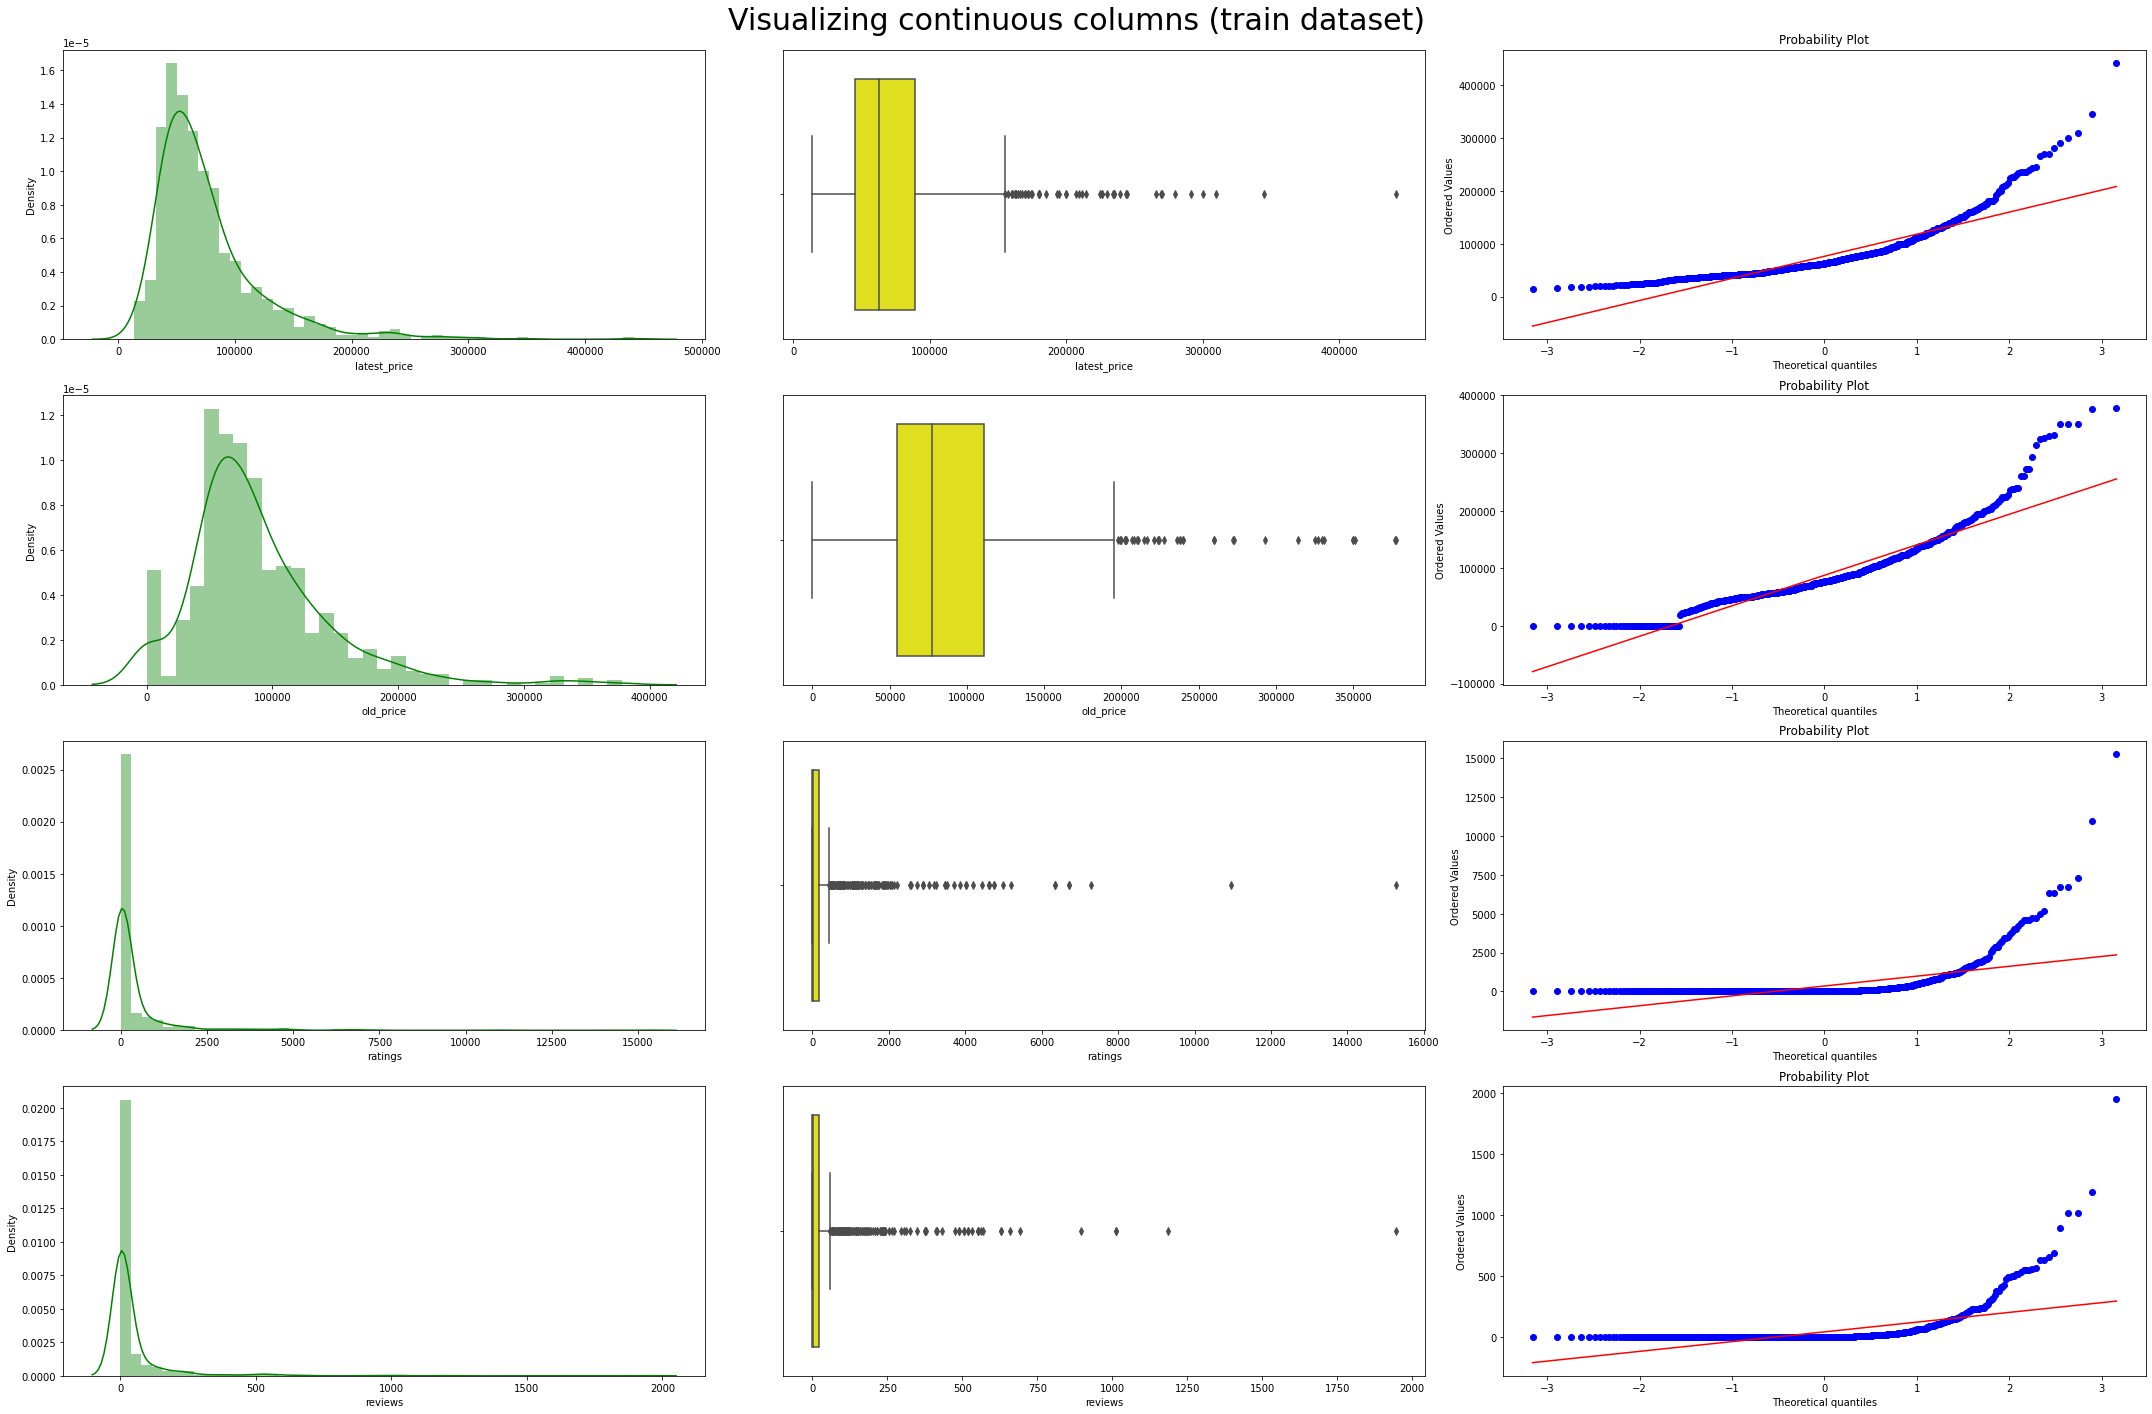

In [16]:
import warnings
warnings.filterwarnings('ignore')
fig,ax = plt.subplots(len(numeric),3,figsize=(30,20))
for index,i in enumerate(numeric):
    sns.distplot(train[i],ax=ax[index,0],color='green')
    sns.boxplot(train[i],ax=ax[index,1],color='yellow')
    stats.probplot(train[i],plot=ax[index,2])
    
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.suptitle("Visualizing continuous columns (train dataset)",fontsize=30)

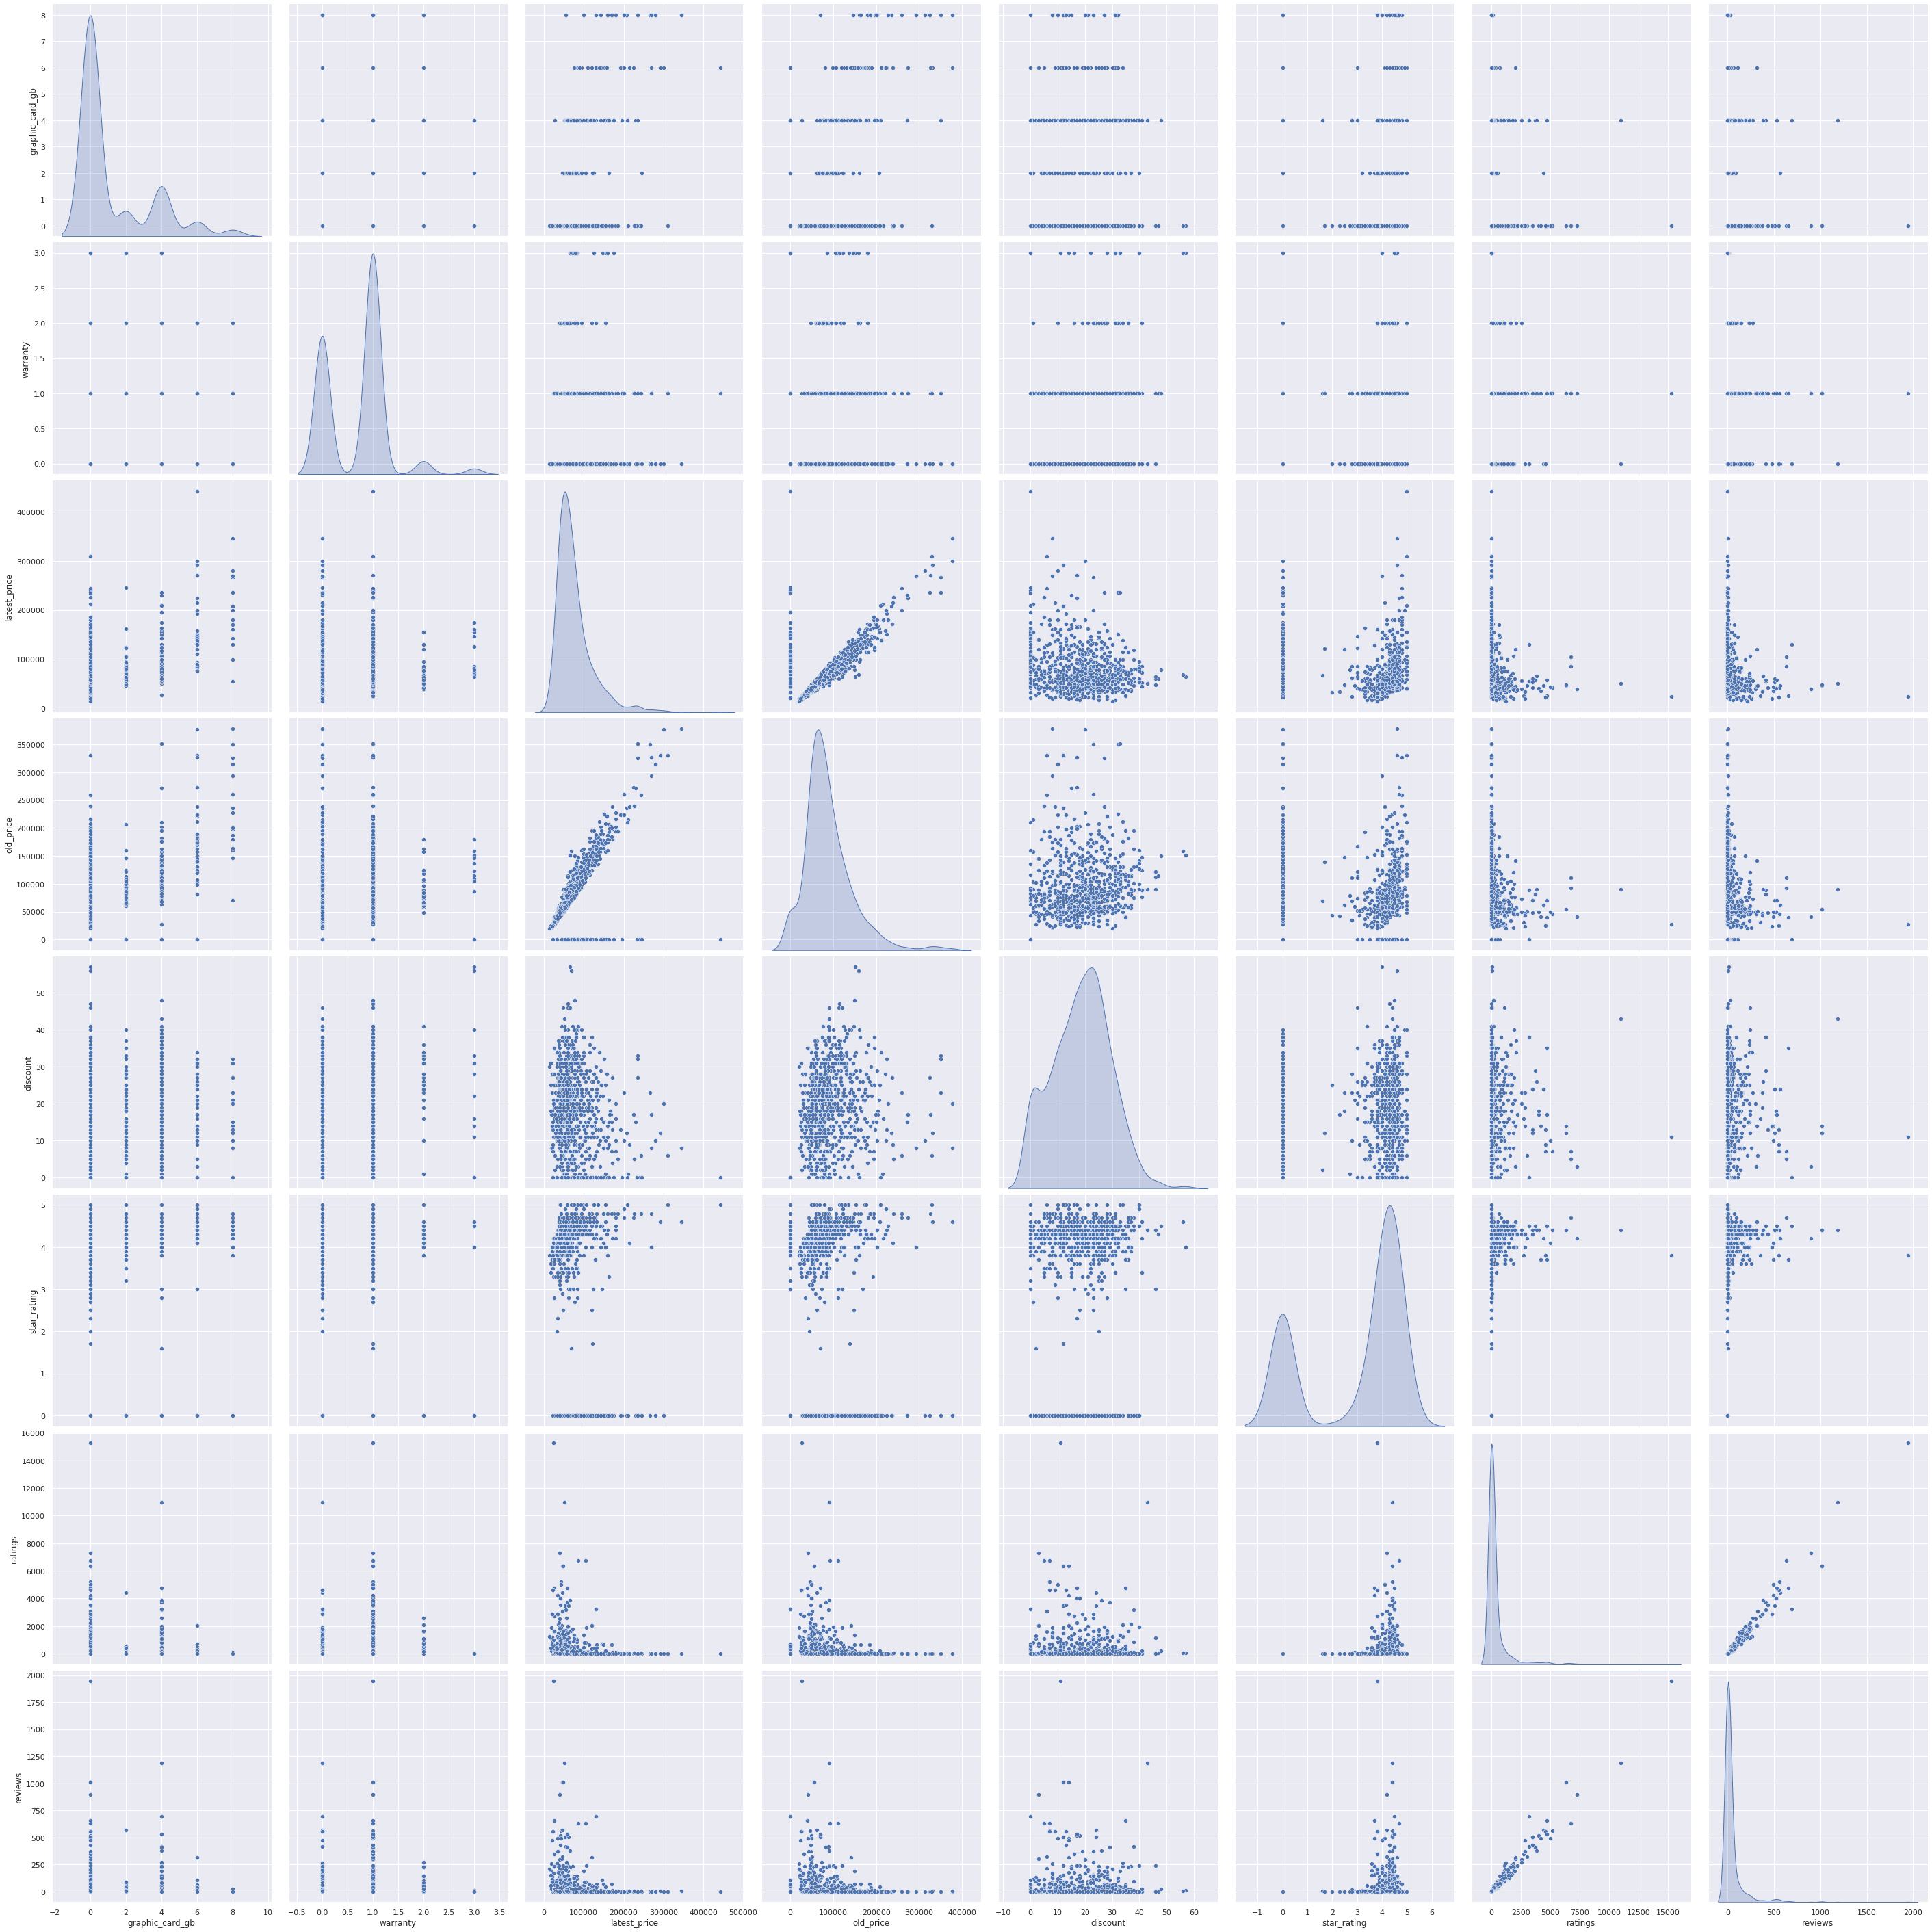

In [17]:
sns.set()
sns.pairplot(train,height = 5 ,kind ='scatter',diag_kind='kde')
plt.show()

In [19]:
categorical_features=['brand', 'processor_brand', 'processor_name',
       'processor_gnrtn', 'ram_gb', 'ram_type', 'ssd', 'hdd', 'os', 'os_bit',
       'graphic_card_gb', 'weight', 'display_size', 'warranty', 'Touchscreen',
       'msoffice', 'discount', 'star_rating']

<Figure size 1080x1800 with 0 Axes>

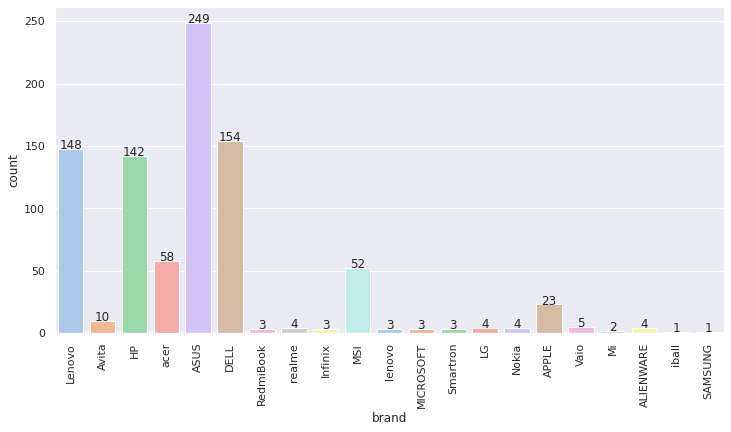

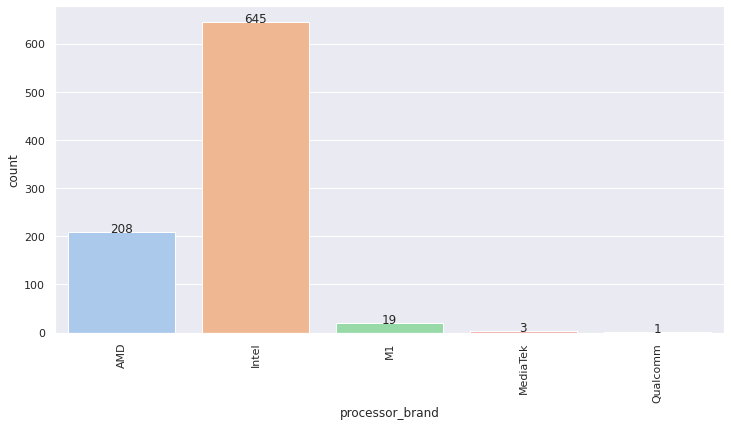

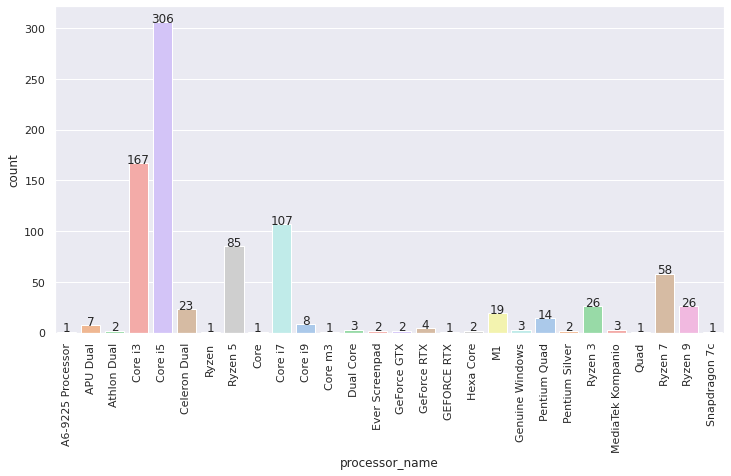

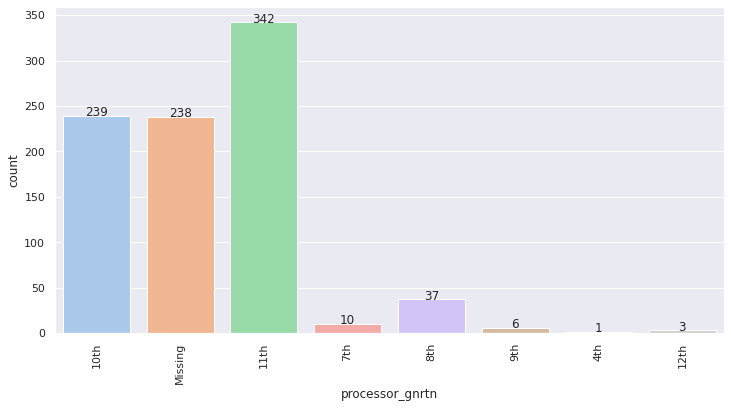

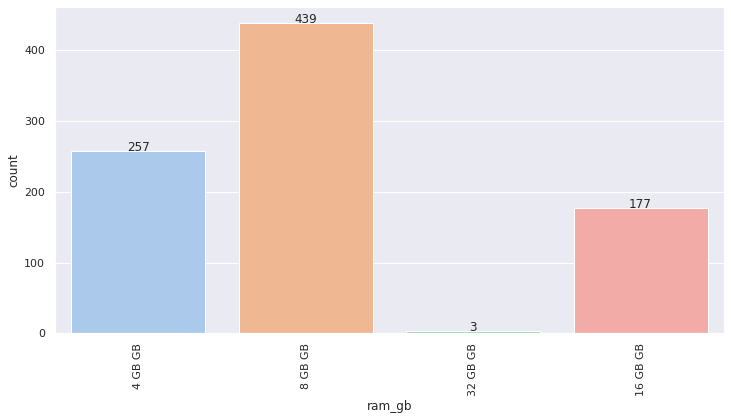

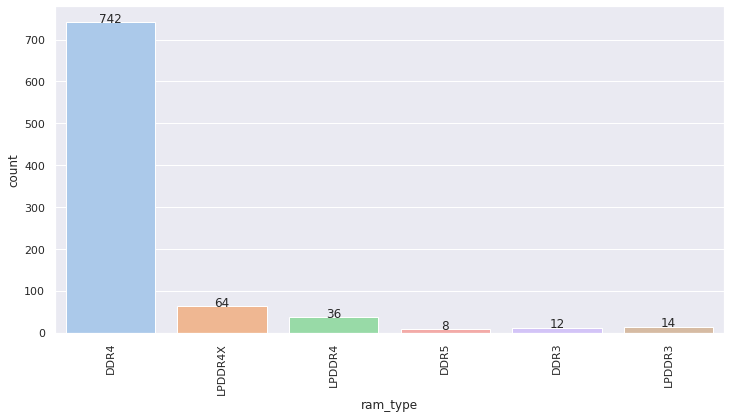

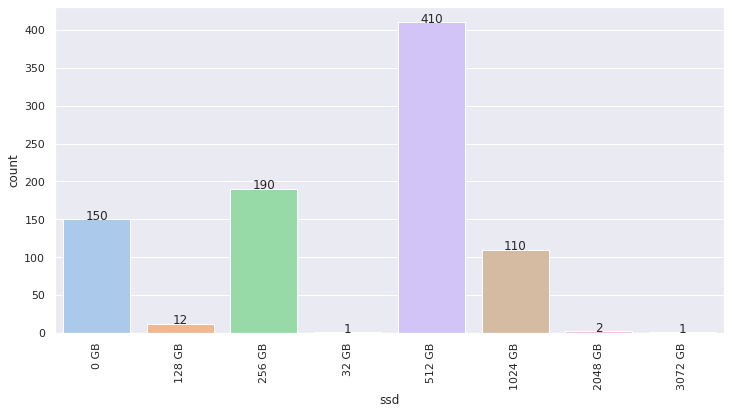

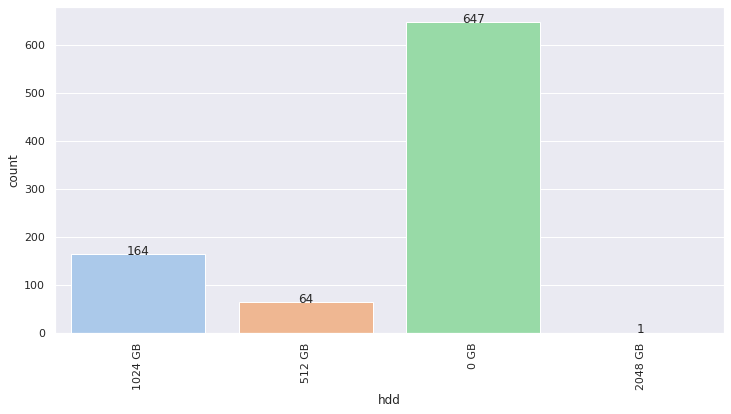

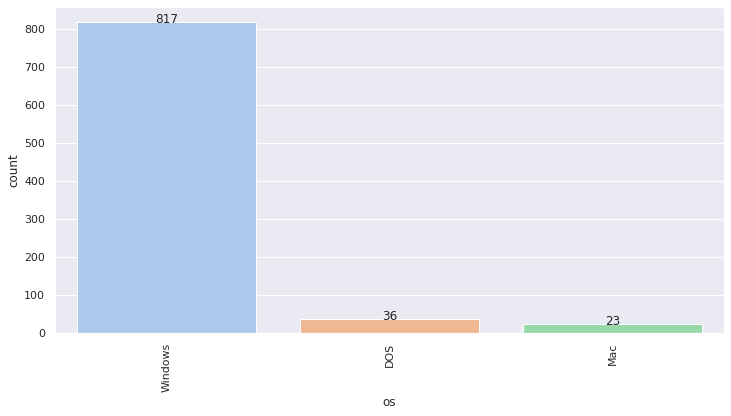

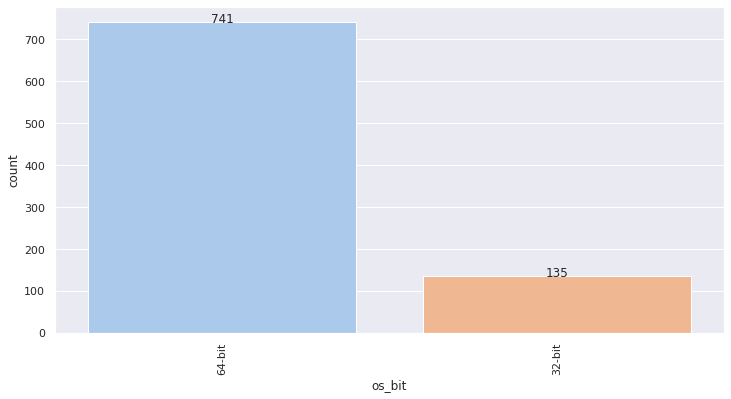

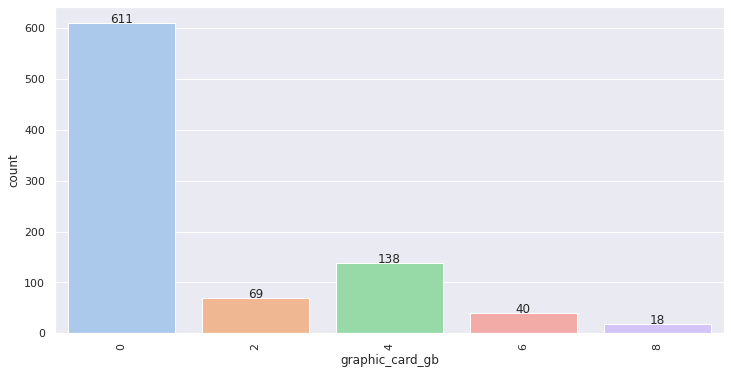

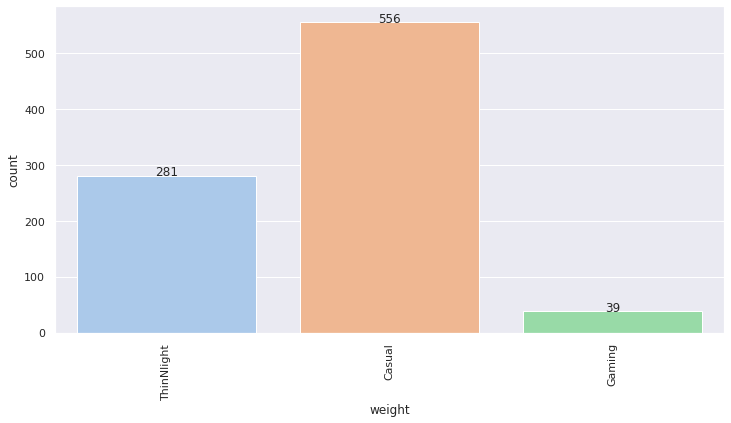

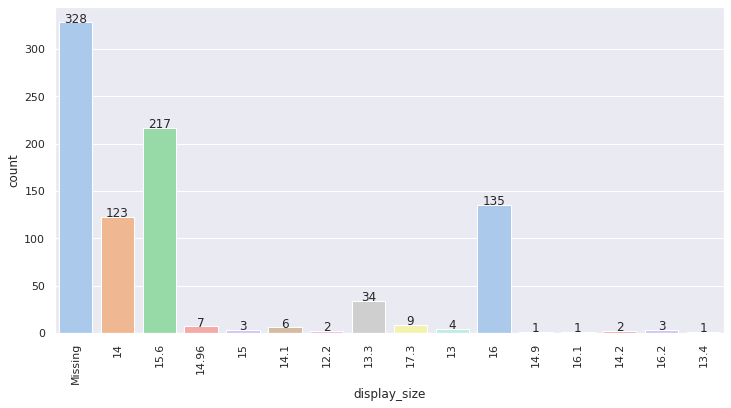

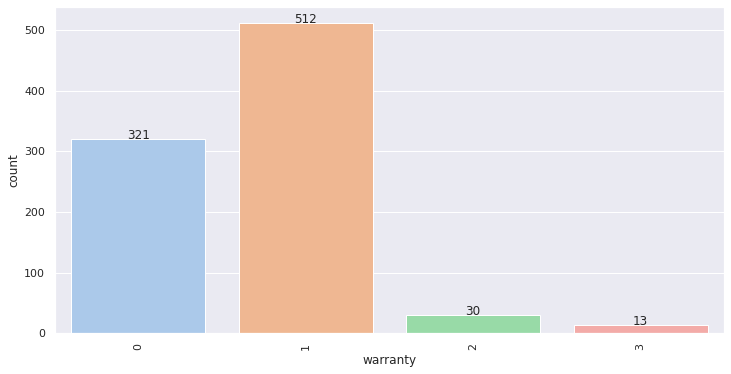

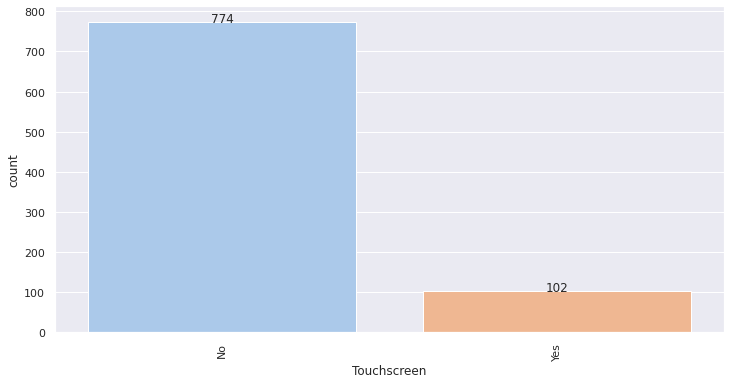

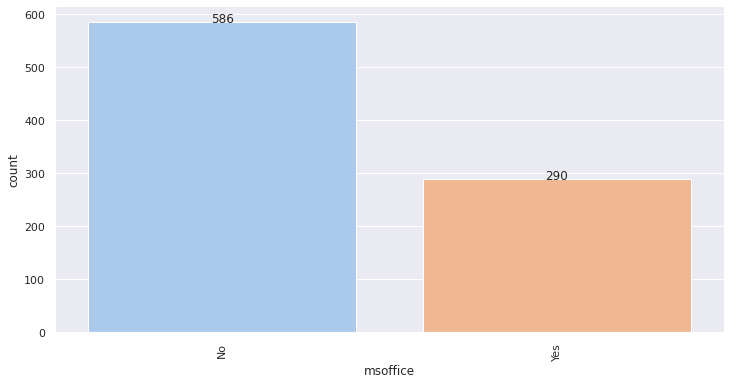

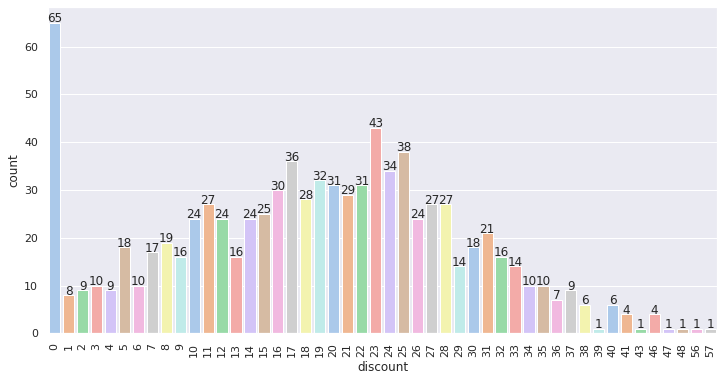

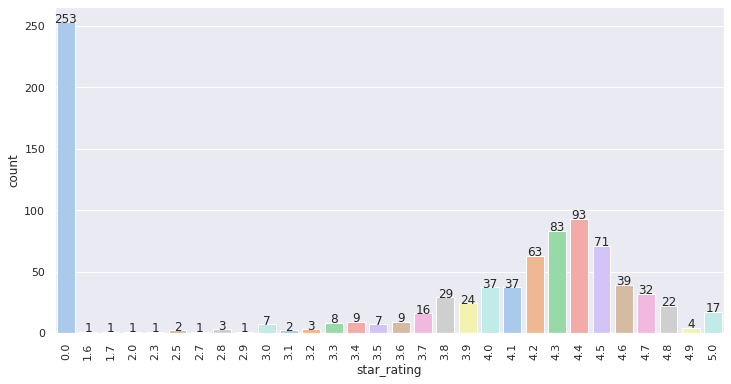

In [20]:
i=1
plt.figure(figsize = (15,25))
for feature in categorical_features:
  fig, ax1 = plt.subplots(figsize=(12,6))
  graph = sns.countplot(ax=ax1,x = feature , data = train,palette='pastel')
  graph.set_xticklabels(graph.get_xticklabels(),rotation=90)
  for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")
  i+=1

Text(0.5, 1.0, 'Top 10 Expensive Laptop Brands')

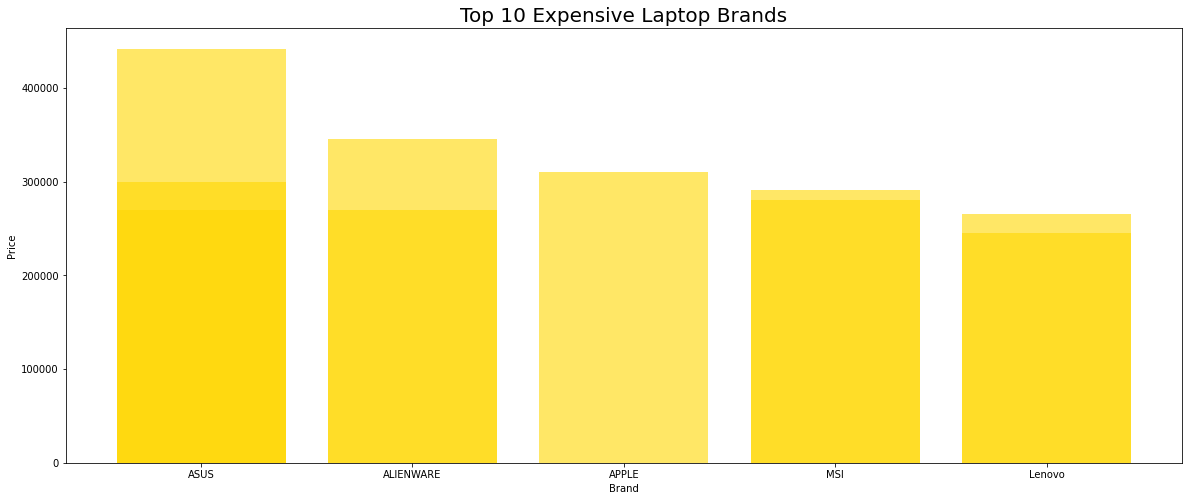

In [10]:
top10 = train.nlargest(10,'latest_price')
plt.figure(figsize=(20,8))
plt.bar(top10['brand'], top10['latest_price'],color='gold',alpha=0.6)
plt.ylabel('Price', fontsize = 10)
plt.xlabel("Brand", fontsize = 10)
plt.title("Top 10 Expensive Laptop Brands", fontsize = 20)

Text(0.5, 1.0, 'Top 10 Cheap Laptop Models')

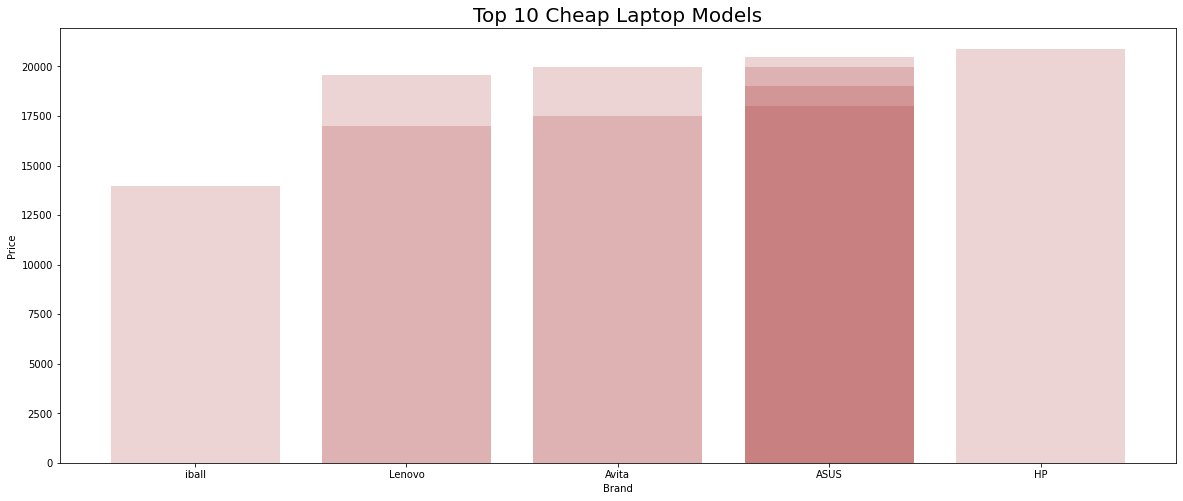

In [12]:
top10 = train.nsmallest(10,'latest_price')
plt.figure(figsize=(20,8))
plt.bar(top10['brand'], top10['latest_price'],color='brown',alpha=0.2)
plt.ylabel('Price', fontsize = 10)
plt.xlabel("Brand", fontsize = 10)
plt.title("Top 10 Cheap Laptop Models", fontsize = 20)

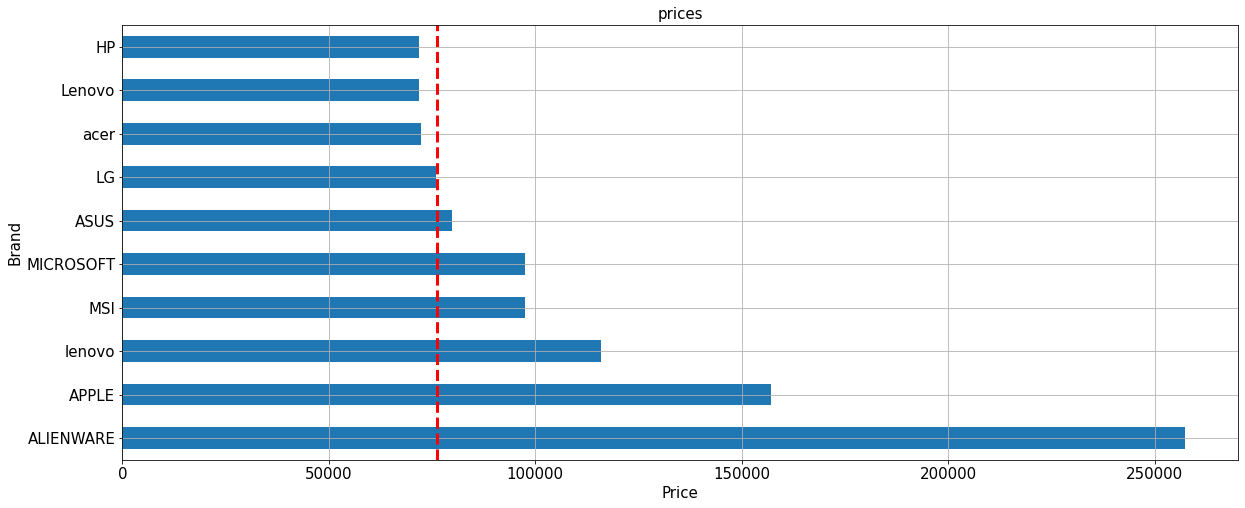

In [13]:
train[['brand','latest_price']].groupby('brand').mean().sort_values(by='latest_price', ascending = False).head(10).plot(kind = 'barh', grid = True, figsize = (20,8), 
        fontsize = 15, rot =0, legend = None)
plt.axvline(train['latest_price'].mean(), color='r', linestyle='dashed', linewidth=3,label='the mean')
plt.xlabel('Price', fontsize = 15)
plt.ylabel('Brand', fontsize = 15)
plt.title("prices", fontsize = 15)
plt.show()

In [13]:
fig = px.bar(train, x="brand", y="processor_name", color="model")
fig.show()

In [16]:
fig = px.sunburst(train, path=['brand', 'model'], values='latest_price',color='brand')
fig.update_layout(margin = dict(t=0, l=0, r=0, b=0))
fig.show()

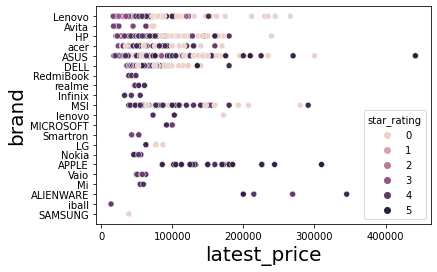

In [15]:
sns.scatterplot(y="brand",x="latest_price",hue="star_rating",data=train)
plt.xlabel("latest_price",fontsize=20)
plt.ylabel("brand",fontsize=20)
plt.show()

In [13]:
correlation = train.corr()
print(correlation['latest_price'].sort_values(ascending = False),'\n')

latest_price       1.000000
old_price          0.744950
graphic_card_gb    0.494891
warranty           0.034402
star_rating       -0.172905
ratings           -0.174766
reviews           -0.175564
discount          -0.207282
Name: latest_price, dtype: float64 



Index(['latest_price', 'old_price', 'graphic_card_gb', 'warranty',
       'star_rating', 'ratings', 'reviews', 'discount'],
      dtype='object')


<AxesSubplot:>

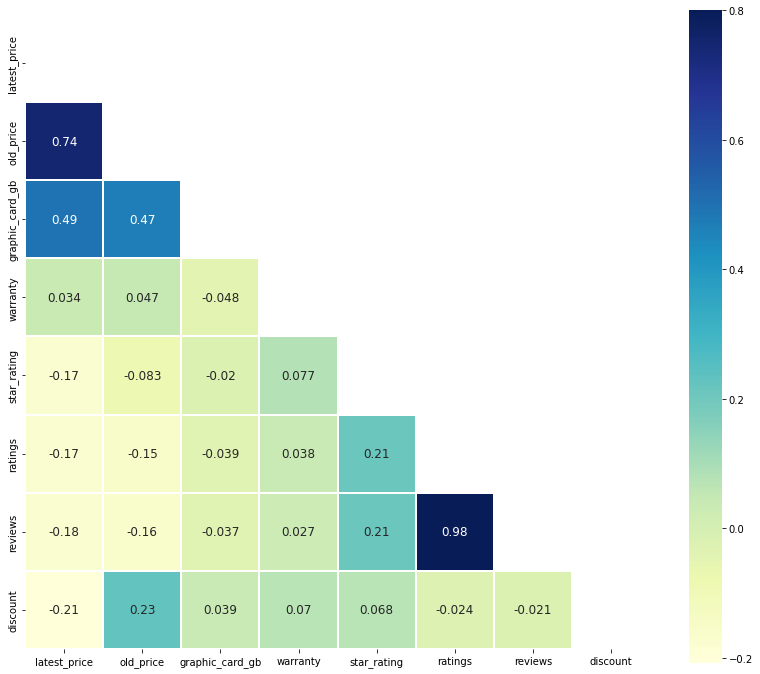

In [14]:
k= 10
cols = correlation.nlargest(k,'latest_price')['latest_price'].index
print(cols)
cm = np.corrcoef(train[cols].values.T)
mask = np.triu(np.ones_like(train.corr()))
f , ax = plt.subplots(figsize = (14,12))
sns.heatmap(cm,mask=mask, vmax=.8, linewidths=0.01,square=True,annot=True,cmap='YlGnBu',
            linecolor="white",xticklabels = cols.values ,annot_kws = {'size':12},yticklabels = cols.values)

# Thank you